In [1]:
import sys
sys.path.append("../")

# 1. 加载元数据

In [2]:
from relgen.data.metadata import Metadata

metadata = Metadata()
metadata.load_from_json("../datasets/single_table_demo/metadata.json")

print(metadata)

tables:
{'student': {'columns': {'id': {'type': 'id'}, 'name': {'type': 'categorical'}, 'age': {'type': 'numerical'}}, 'primary_key': 'id'}}
relationships:
[]


# 2. 加载数据

In [3]:
import pandas as pd

data = {
    "student": pd.read_csv("../datasets/single_table_demo/student.csv")
}

data["student"].head(10)

,id,name,age
0,0,jlv,37
1,1,vyD,34
2,2,Gev,31
3,3,hKU,44
4,4,ZOK,29
5,5,BTP,45
6,6,JPB,29
7,7,jge,43
8,8,GoP,28
9,9,ouv,37


# 3. 数据转换器

In [4]:
from relgen.data.dataset import Dataset

dataset = Dataset(metadata)
dataset.fit(data)

# 4. 数据合成器

In [5]:
from relgen.synthesizer.arsynthesizer import MADESynthesizer

synthesizer = MADESynthesizer(dataset)
synthesizer.fit(data)

table student start training
epoch 0: train loss 12.790, time cost 0.004s
epoch 1: train loss 12.775, time cost 0.003s
epoch 2: train loss 12.700, time cost 0.004s
epoch 3: train loss 12.654, time cost 0.004s
epoch 4: train loss 12.572, time cost 0.003s
epoch 5: train loss 12.500, time cost 0.003s
epoch 6: train loss 12.430, time cost 0.003s
epoch 7: train loss 12.439, time cost 0.003s
epoch 8: train loss 12.387, time cost 0.003s
epoch 9: train loss 12.239, time cost 0.003s
epoch 10: train loss 12.128, time cost 0.003s
epoch 11: train loss 12.468, time cost 0.003s
epoch 12: train loss 12.249, time cost 0.003s
epoch 13: train loss 11.900, time cost 0.003s
epoch 14: train loss 12.291, time cost 0.003s
epoch 15: train loss 11.690, time cost 0.003s
epoch 16: train loss 12.068, time cost 0.004s
epoch 17: train loss 11.911, time cost 0.003s
epoch 18: train loss 12.213, time cost 0.003s
epoch 19: train loss 12.142, time cost 0.003s
epoch 20: train loss 11.660, time cost 0.004s
epoch 21: train

# 5. 合成数据

In [6]:
sampled_data = synthesizer.sample()

sampled_data["student"].head(10)

,id,name,age
0,0,gUV,26
1,1,doH,44
2,2,qtp,22
3,3,VUQ,28
4,4,ouv,37
5,5,fcg,21
6,6,ihv,37
7,7,VUQ,48
8,8,ouv,34
9,9,vVf,44


# 6. 数据评估器

In [7]:
from relgen.evaluator import Evaluator

evaluator = Evaluator(data["student"], sampled_data["student"])

matplotlib data path: /Users/zhangzhewei/anaconda3/envs/relgen/lib/python3.8/site-packages/matplotlib/mpl-data
CONFIGDIR=/Users/zhangzhewei/.matplotlib
interactive is False
platform is darwin
loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_io', 'marshal', 'posix', '_frozen_importlib_external', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', '_stat', 'stat', '_collections_abc', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_locale', '_bootlocale', '_distutils_hack', 'types', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib', 'importlib.machinery', 'importlib.abc', '_operator', 'operator', 'keyword', '_heapq', 'heapq', 'itertools', 'reprlib', '_collections', 'collections', '_functools', 'functools', 'contextlib', 'importlib.util', 'mpl_toolkits', 'site', '_weakrefset', 'weakre

In [8]:
evaluator.eval_fidelity()

{'JS_distance Mean': 0.4220885340581985,
 'JS_distance Std': 0.0,
 'JS_distance Max': 0.4220885340581985,
 'JS_distance Min': 0.4220885340581985,
 'WD_distance Mean': 0.49,
 'WD_distance Std': 0.49,
 'WD_distance Max': 0.98,
 'WD_distance Min': 0.0,
 'Diff.Corr Mean': 0.09852498295225837,
 'Discriminator Measure': 0.125}

In [9]:
evaluator.eval_privacy()

{'DCR 5 percentile': 0.014361898184149516,
 'NNDR 5 percentile': 0.11948285757337251}

In [10]:
evaluator.eval_diversity()

{'Sampling Diversity': 0.77}

Loaded backend module://matplotlib_inline.backend_inline version unknown.
Loaded backend module://matplotlib_inline.backend_inline version unknown.
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='/Users/zhangzhewei/anaconda3/envs/relgen/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXNonUni.ttf', name='STIXNonUnicode', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='/Users/zhangzhewei/anaconda3/envs/relgen/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-BoldItalic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=700, stretch='normal', size='scalable')) = 11.335
findfont: score(FontEntry(fname='/Users/zhangzhewei/anaconda3/envs/relgen/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBolIta.ttf', name='STIXGeneral', style='italic', variant='normal', weight=7

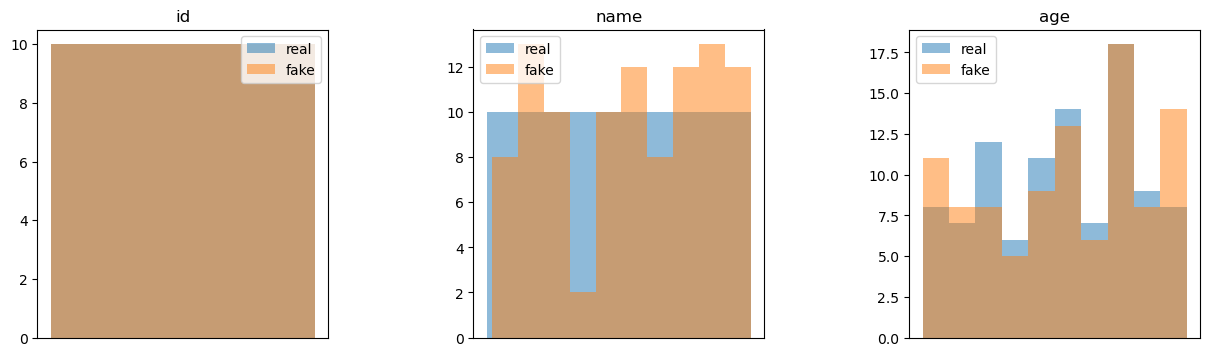

In [11]:
evaluator.eval_histogram()

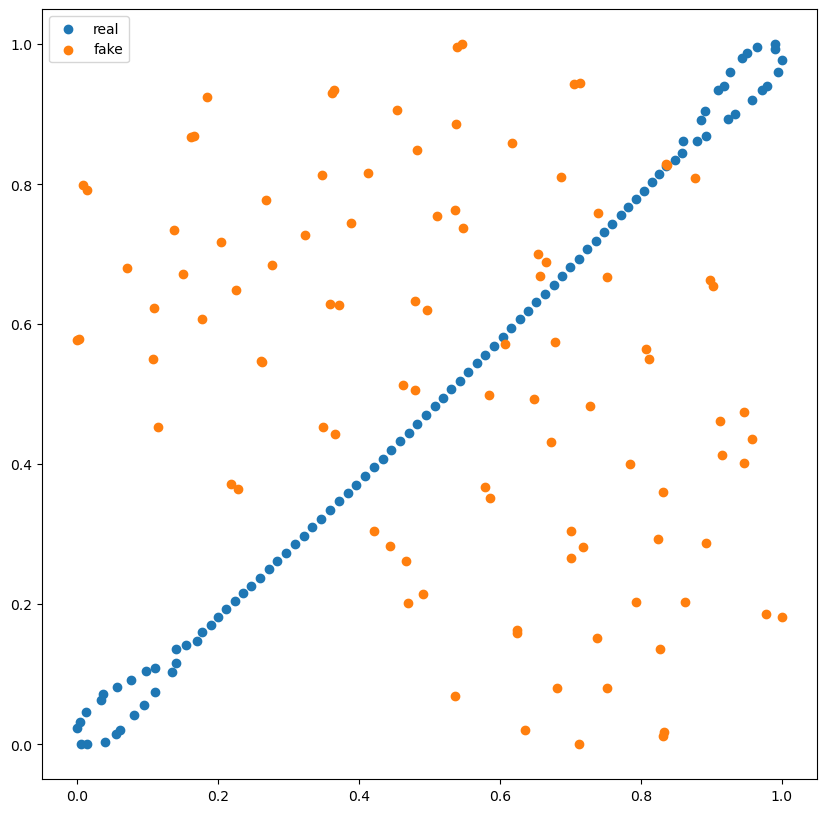

In [12]:
evaluator.eval_tsne()